# Name - Rohit Srivastava
# PGID - 12220079

## Importing the necessary libraries

In [1]:
import praw
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import bigrams
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from gensim import corpora, models
import gensim
from collections import Counter

## Authenticating with Reddit

In [2]:
reddit = praw.Reddit(client_id='51bnTUFR_tVyjaJZhWjihQ', 
                     client_secret='4CnYM7Gw4nYweb3cAD1ygldQ6itn_w', 
                     user_agent='python:SubTrendAnalyzer:v1.0 (by /u/spirit9966)')

## Choosing a subreddit

In [3]:
subreddit = reddit.subreddit('technology')

In [4]:
reddit

In [5]:
subreddit

Subreddit(display_name='technology')

## Extracting the data

In [6]:
# Preparing to store the data
posts_data = []
for submission in subreddit.hot(limit=None):  
    posts_data.append({
        'title': submission.title,
        'id': submission.id,
        'author': str(submission.author),
        'created_utc': submission.created_utc,
        'score': submission.score,
        'upvote_ratio': submission.upvote_ratio,
        'url': submission.url
    })

In [7]:
# Converting to DataFrame
posts_df = pd.DataFrame(posts_data)

In [8]:
posts_df

,title,id,author,created_utc,score,upvote_ratio,url
0,Wayfair lays off 13% of its workforce weeks af...,19apaw5,esporx,1.705687e+09,1690,0.96,https://www.cnn.com/2024/01/19/investing/wayfa...
1,"Apple Vision Pro Sold Out, At Least For Pre-Order",19aq9vi,nastyjman,1.705690e+09,974,0.87,https://www.forbes.com/sites/johnkoetsier/2024...
2,Each Facebook User Is Monitored by Thousands o...,19agmrb,fattyfoods,1.705662e+09,3751,0.96,https://www.consumerreports.org/electronics/pr...
3,A New York Times copyright lawsuit could kill ...,19ahg9y,10MinsForUsername,1.705665e+09,1764,0.89,https://www.vox.com/technology/2024/1/18/24041...
4,What happens when a school bans smartphones? A...,19aij1t,benderunit9000,1.705669e+09,907,0.91,https://www.theguardian.com/lifeandstyle/2024/...
...,...,...,...,...,...,...,...
555,Ivanti warns of critical vulnerability in its ...,18zk07d,hawlc,1.704495e+09,33,0.83,https://arstechnica.com/security/2024/01/ivant...
556,How AI could reveal secrets of thousands of ha...,18z72m1,BalticsFox,1.704462e+09,142,0.89,https://theconversation.com/how-ai-could-revea...
557,HyperVerse hedge fund CEO may not exist — Inve...,18yg66f,marketrent,1.704383e+09,8755,0.96,https://arstechnica.com/tech-policy/2024/01/cr...
558,Google Chrome starts blocking data tracking co...,18z64x4,UtsavTiwari,1.704459e+09,150,0.87,https://sg.finance.yahoo.com/news/google-chrom...


## Saving to a CSV file


In [9]:
posts_df.to_csv('reddit_technology_posts.csv', index=False)

## Identifying keywords, hashtags, and influencers most likely to play a role in this topic. 

In [10]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to C:\Users\Rohit
[nltk_data]     Srivastava\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Rohit
[nltk_data]     Srivastava\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\Rohit
[nltk_data]     Srivastava\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [11]:
# Loading the dataset
df = pd.read_csv('reddit_technology_posts.csv')

In [12]:
# Combining all post titles
text = ' '.join(df['title'].tolist()).lower()

In [13]:
# Tokenizing and cleaning the text
tokens = word_tokenize(text)
clean_tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]

In [14]:
# Bi-gram Analysis for most common 100 bi-grams
bi_grams = list(bigrams(clean_tokens))
filtered_bi_grams = [bg for bg in bi_grams if all(word.isalpha() for word in bg)]
bi_gram_freq = Counter(filtered_bi_grams)
print("Most common bi-grams:", bi_gram_freq.most_common(100))

Most common bi-grams: [(('vision', 'pro'), 11), (('apple', 'vision'), 9), (('generative', 'ai'), 6), (('google', 'search'), 5), (('app', 'store'), 5), (('use', 'ai'), 5), (('boeing', 'max'), 5), (('social', 'media'), 4), (('artificial', 'intelligence'), 4), (('big', 'tech'), 4), (('job', 'cuts'), 4), (('cuts', 'year'), 4), (('ai', 'help'), 4), (('report', 'says'), 4), (('using', 'ai'), 4), (('elon', 'musk'), 4), (('could', 'help'), 3), (('tech', 'company'), 3), (('ban', 'military'), 3), (('new', 'ai'), 3), (('expect', 'job'), 3), (('google', 'deepmind'), 3), (('search', 'results'), 3), (('getting', 'worse'), 3), (('eu', 'antitrust'), 3), (('says', 'ai'), 3), (('apple', 'watches'), 3), (('electric', 'cars'), 3), (('ai', 'tools'), 3), (('imf', 'says'), 3), (('cnn', 'business'), 3), (('charges', 'minutes'), 3), (('minutes', 'lasts'), 3), (('lasts', 'thousands'), 3), (('thousands', 'cycles'), 3), (('ai', 'models'), 3), (('gpt', 'store'), 3), (('tim', 'cook'), 3), (('biggest', 'threat'), 3)

In [15]:
# Keyword Analysis for most common 100 keywords
word_freq = Counter(clean_tokens)
print("Most common words:", word_freq.most_common(100))

Most common words: [('ai', 99), ('apple', 43), ('new', 42), ('google', 36), ('us', 29), ('says', 28), ('could', 23), ('openai', 21), ('tech', 21), ('data', 19), ('company', 15), ('first', 15), ('chatgpt', 14), ('youtube', 14), ('power', 14), ('use', 13), ('battery', 13), ('video', 13), ('vision', 12), ('pro', 12), ('eu', 12), ('used', 12), ('launch', 12), ('microsoft', 12), ('using', 12), ('million', 12), ('china', 12), ('software', 11), ('amazon', 11), ('year', 11), ('years', 11), ('say', 11), ('big', 11), ('solar', 11), ('app', 11), ('users', 11), ('world', 11), ('internet', 11), ('electric', 11), ('claims', 11), ('boeing', 11), ('tesla', 11), ('ces', 11), ('employees', 10), ('help', 10), ('ban', 10), ('technology', 10), ('store', 10), ('jobs', 10), ('may', 10), ('cuts', 10), ('thousands', 9), ('companies', 9), ('pay', 9), ('online', 9), ('artificial', 9), ('billion', 9), ('search', 9), ('make', 9), ('global', 9), ('generative', 9), ('media', 8), ('face', 8), ('space', 8), ('antitrus

In [16]:
# User Engagement Analysis 
df['engagement_score'] = df['score'] * df['upvote_ratio']
top_engaged_posts = df.sort_values(by='engagement_score', ascending=False).head(100)
print("Top engaged posts:\n", top_engaged_posts[['title', 'engagement_score']])

Top engaged posts:
                                                  title  engagement_score
65   A year long study shows what you've suspected:...          23241.75
388  X Purges Prominent Journalists, Leftists With ...          23033.38
514  Tesla Cybertruck gets less than 80% of adverti...          18216.88
559  San Francisco says tiny sleeping 'pods,' which...          16967.94
158  Formula E team fires its AI-generated female m...          16830.90
..                                                 ...               ...
506  Half Of All Skills Will Be Outdated Within Two...           1348.75
24   European Union set to revise cookie law, admit...           1293.98
313  As Disney pushes towards streaming profitabili...           1285.35
266  EU antitrust chief to Tim Cook: Apple must all...           1256.78
538  Nvidia teases RTX 40 Super series launch at CE...           1235.78

[100 rows x 2 columns]


In [17]:
# Top 20 Influencer Identification
top_authors = df['author'].value_counts().head(20)
print("Top authors (influencers):\n", top_authors)

Top authors (influencers):
 author
chrisdh79               32
SparklySpencer          28
Wagamaga                24
CrankyBear              17
giuliomagnifico         16
marketrent              15
Maxie445                14
waozen                  12
barweis                 12
Ssider69                11
PsychoComet              9
Franco1875               9
TommyAdagio              8
Hrmbee                   8
Loki-L                   8
OddNugget                7
Saltedline               7
UtsavTiwari              7
RepresentativeCap571     6
lurker_bee               6
Name: count, dtype: int64


## Identifying the different groups here and the conversations

In [18]:
# Sentiment Analysis
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['title'].apply(lambda title: sia.polarity_scores(title))

# Function to categorize sentiment based on compound score
def categorize_sentiment(compound_score):
    if compound_score >= 0.05:
        return "Positive"
    elif compound_score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Extracting the compound score and categorizing the sentiment
df['compound'] = df['sentiment'].apply(lambda s: s['compound'])
df['sentiment_category'] = df['compound'].apply(categorize_sentiment)

# Displaying the DataFrame with the new columns
print(df[['title', 'compound', 'sentiment_category']].head(10))

# Sorting for top positive and negative titles
top_positive = df.sort_values(by='compound', ascending=False).head(10)
top_negative = df.sort_values(by='compound').head(10)

# Print the sorted titles for analysis
print("Top Positive Titles:\n", top_positive[['title', 'compound']])
print("Top Negative Titles:\n", top_negative[['title', 'compound']])

                                               title  compound  \
0  Wayfair lays off 13% of its workforce weeks af...    0.0000   
1  Apple Vision Pro Sold Out, At Least For Pre-Order    0.2500   
2  Each Facebook User Is Monitored by Thousands o...    0.0000   
3  A New York Times copyright lawsuit could kill ...   -0.7650   
4  What happens when a school bans smartphones? A...    0.0000   
5  Samsung’s $1,300 phone might someday have fees...    0.0000   
6  Fujitsu bugs that sent innocent people to pris...   -0.2263   
7  Pope calls for treaty regulating AI, warning o...   -0.3400   
8  Amazon plans to charge for Alexa in June—unles...   -0.1531   
9  EU wants music streaming platforms to pay arti...   -0.1027   

  sentiment_category  
0            Neutral  
1           Positive  
2            Neutral  
3           Negative  
4            Neutral  
5            Neutral  
6           Negative  
7           Negative  
8           Negative  
9           Negative  
Top Positive Titles:

In [19]:
# Fetching the top 20 hot posts from the specified subreddit
top_posts = subreddit.hot(limit=20)

for post in top_posts:
    # Sorting comments by 'best' for each post
    post.comment_sort = 'best'
    # Replacing "more comments" links with actual comments up to a limit (0 here means no additional comments are loaded)
    post.comments.replace_more(limit=0)
    # Fetching the top comment of each post, if it exists
    top_comment = post.comments[0] if post.comments else None
    # Printing the post title and the body of the top comment
    print(f"Post: {post.title}, Top comment: {top_comment.body if top_comment else 'No comments'}")

Post: Wayfair lays off 13% of its workforce weeks after telling employees to work harder, Top comment: I have never heard of a place where someone can just tell people to work harder and the people will magically become more productive.
Post: Apple Vision Pro Sold Out, At Least For Pre-Order, Top comment: WARNING! The link in question may require you to disable ad-blockers to see content.  Though not required, please consider submitting an alternative source for this story.

WARNING! Disabling your ad blocker may open you up to malware infections, malicious cookies and can expose you to unwanted tracker networks.  PROCEED WITH CAUTION.

Do not open any files which are automatically downloaded, and do not enter personal information on any page you do not trust. 
If you are concerned about tracking, consider opening the page in an incognito window, and verify that your browser is sending "do not track" requests.  

IF YOU ENCOUNTER ANY MALWARE, MALICIOUS TRACKERS, CLICKJACKING, OR REDIRE

In [20]:
# df['title'] is a Series of post titles
documents = [word_tokenize(title.lower()) for title in df['title']]

# Cleaning and tokenizing each document
clean_documents = [[word for word in doc if word.isalpha() and word not in stopwords.words('english')] for doc in documents]

# clean_documents for LDA
dictionary = corpora.Dictionary(clean_documents)
corpus = [dictionary.doc2bow(doc) for doc in clean_documents]

# Runing LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=100, id2word=dictionary, passes=15)
topics = lda_model.print_topics(num_words=4)
for topic in topics:
    print(topic)

(68, '0.041*"electricity" + 0.041*"renewables" + 0.041*"largest" + 0.020*"lowest"')
(66, '0.022*"bugs" + 0.022*"video" + 0.022*"youtube" + 0.022*"views"')
(24, '0.025*"us" + 0.025*"meta" + 0.025*"canadian" + 0.025*"workforce"')
(1, '0.041*"products" + 0.027*"really" + 0.014*"launch" + 0.014*"investigation"')
(8, '0.063*"ai" + 0.048*"better" + 0.016*"human" + 0.016*"doctors"')
(58, '0.090*"ai" + 0.040*"approves" + 0.020*"regulations" + 0.020*"dangerous"')
(40, '0.030*"moon" + 0.030*"yet" + 0.030*"boost" + 0.030*"worse"')
(36, '0.057*"help" + 0.038*"thinks" + 0.038*"traffic" + 0.038*"newsom"')
(19, '0.054*"power" + 0.052*"project" + 0.035*"solar" + 0.035*"space"')
(83, '0.043*"apple" + 0.018*"says" + 0.018*"slowdown" + 0.018*"adblock"')
(16, '0.026*"facebook" + 0.026*"new" + 0.017*"youtube" + 0.017*"person"')
(81, '0.108*"apple" + 0.096*"vision" + 0.096*"pro" + 0.036*"february"')
(90, '0.028*"might" + 0.028*"ai" + 0.028*"different" + 0.019*"networks"')
(18, '0.038*"apple" + 0.038*"claims

## Visualizations

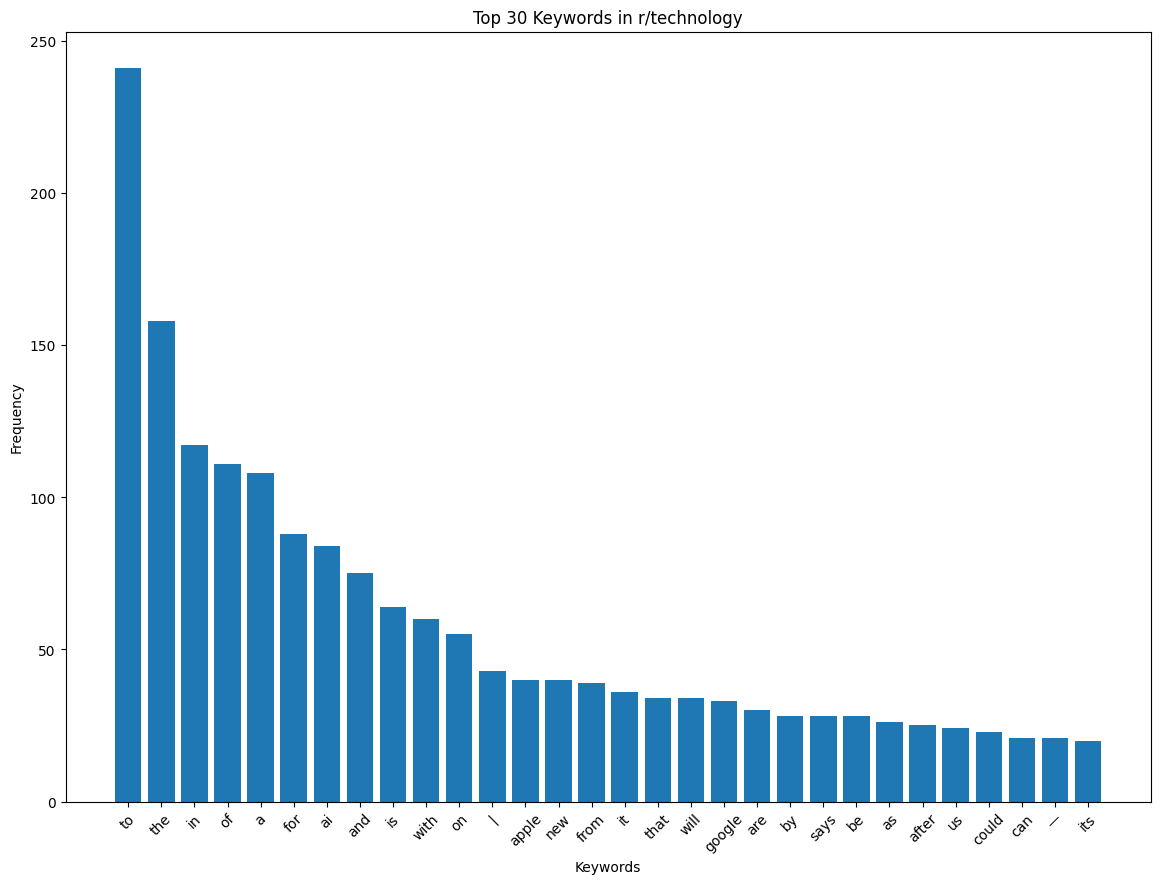

In [21]:
# Extracting keywords from titles
keywords = df['title'].str.cat(sep=' ').lower().split()
keywords_count = Counter(keywords)

# Selecting top 30 keywords
top_keywords = dict(keywords_count.most_common(30))

# Creating a bar chart
plt.figure(figsize=(14, 10))
plt.bar(top_keywords.keys(), top_keywords.values())
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.title('Top 30 Keywords in r/technology')
plt.xticks(rotation=45)
plt.show()

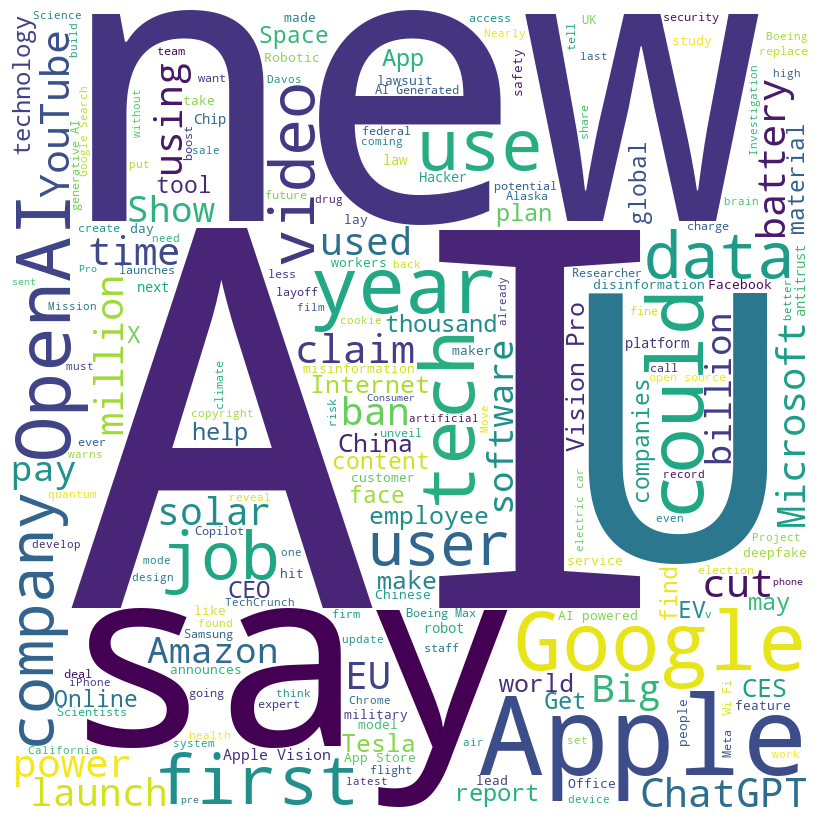

In [22]:
# Combining all post titles
text = ' '.join(df['title'].tolist())

# Generating word cloud
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      stopwords = set(stopwords.words('english')), 
                      min_font_size = 10).generate(text)

# Plotting the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()